In [1]:
import matplotlib
matplotlib.use('Agg')
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import pandas as pd
import matplotlib.pyplot as plt
from scipy import misc
import numpy as np

%matplotlib notebook

# Import Data

In [2]:
data2017 = pd.read_csv("./assets/COBRA-YTD2017.csv")
data2017.head()

,MI_PRINX,offense_id,rpt_date,occur_date,occur_time,poss_date,poss_time,beat,apt_office_prefix,apt_office_num,...,dispo_code,MaxOfnum_victims,Shift,Avg Day,loc_type,UC2 Literal,neighborhood,npu,x,y
0,7366952,162680163,02/25/2017,09/24/2016,01:00:00,09/24/2016,01:00:00,204,NaN,NaN,...,NaN,2.0,Morn,Sat,NaN,ROBBERY-RESIDENCE,Underwood Hills,D,-84.42029,33.80950
1,7370443,163090763,01/02/2017,11/04/2016,23:00:00,01/02/2017,23:00:00,306,NaN,NaN,...,NaN,1.0,Unk,Unk,4.0,LARCENY-FROM VEHICLE,Sylvan Hills,X,-84.42093,33.70894
2,7371856,163282668,04/20/2017,11/23/2016,19:00:00,11/23/2016,20:00:00,211,NaN,NaN,...,10,1.0,Eve,Wed,18.0,AUTO THEFT,Lindbergh/Morosgo,B,-84.37123,33.82346
3,7373785,163522791,01/02/2017,12/18/2016,01:00:00,12/18/2016,01:30:00,303,NaN,NaN,...,NaN,1.0,Morn,Sun,18.0,LARCENY-FROM VEHICLE,Mechanicsville,V,-84.39438,33.73699
4,7373854,163532016,01/19/2017,12/18/2016,16:46:00,12/18/2016,16:50:00,506,NaN,NaN,...,NaN,1.0,Eve,Sun,NaN,LARCENY-FROM VEHICLE,Midtown,E,-84.37428,33.77777


In [3]:
data2016 = pd.read_csv("./assets/COBRADATA2016.csv")
data2016.head()

,MI_PRINX,offense_id,rpt_date,occur_date,occur_time,poss_date,poss_time,beat,apt_office_prefix,apt_office_num,...,dispo_code,MaxOfnum_victims,Shift,Avg Day,loc_type,UC2 Literal,neighborhood,npu,x,y
0,5637549,150102493,01/10/2016,01/10/2016,22:00:00,01/10/2016,22:00:00,511,NaN,NaN,...,NaN,1.0,Eve,Sun,21.0,BURGLARY-NONRES,Downtown,M,-84.39487,33.75757
1,5641270,150611492,03/01/2016,02/25/2016,12:00:00,02/29/2016,19:00:00,412,NaN,NaN,...,NaN,1.0,Unk,Unk,20.0,LARCENY-NON VEHICLE,Vine City,L,-84.41411,33.75823
2,5648012,151471800,05/26/2016,05/26/2016,08:30:00,05/26/2016,13:00:00,206,NaN,NaN,...,NaN,1.0,Day,Thu,99.0,LARCENY-NON VEHICLE,Blandtown,D,-84.42561,33.80058
3,5659772,152792664,01/13/2016,10/06/2015,20:00:00,10/06/2015,20:25:00,210,NaN,NaN,...,NaN,1.0,Eve,Tue,8.0,LARCENY-NON VEHICLE,Lenox,B,-84.36212,33.84676
4,5664938,153412960,01/13/2016,12/07/2015,21:00:00,12/07/2015,21:05:00,208,NaN,NaN,...,NaN,1.0,Eve,Mon,24.0,LARCENY-FROM VEHICLE,Buckhead Forest,B,-84.37385,33.84755


Do they have all the same columns?

In [4]:
out = len(data2016.columns)==len(data2017.columns) # Verify that they are the same length in terms of columns
if out:
    for i in data2016.columns: # go through all columns in 2016
        if i not in data2017.columns: # and check that they are in 2017
            out = False
            break
print(out)

True


Ok, great. Now lets concatenate them.

In [5]:
data = pd.concat([data2016, data2017])
print(len(data)==len(data2016)+len(data2017)) # Verify they are indeed the proper new length
data.head()

True


,MI_PRINX,offense_id,rpt_date,occur_date,occur_time,poss_date,poss_time,beat,apt_office_prefix,apt_office_num,...,dispo_code,MaxOfnum_victims,Shift,Avg Day,loc_type,UC2 Literal,neighborhood,npu,x,y
0,5637549,150102493,01/10/2016,01/10/2016,22:00:00,01/10/2016,22:00:00,511,NaN,NaN,...,NaN,1.0,Eve,Sun,21.0,BURGLARY-NONRES,Downtown,M,-84.39487,33.75757
1,5641270,150611492,03/01/2016,02/25/2016,12:00:00,02/29/2016,19:00:00,412,NaN,NaN,...,NaN,1.0,Unk,Unk,20.0,LARCENY-NON VEHICLE,Vine City,L,-84.41411,33.75823
2,5648012,151471800,05/26/2016,05/26/2016,08:30:00,05/26/2016,13:00:00,206,NaN,NaN,...,NaN,1.0,Day,Thu,99.0,LARCENY-NON VEHICLE,Blandtown,D,-84.42561,33.80058
3,5659772,152792664,01/13/2016,10/06/2015,20:00:00,10/06/2015,20:25:00,210,NaN,NaN,...,NaN,1.0,Eve,Tue,8.0,LARCENY-NON VEHICLE,Lenox,B,-84.36212,33.84676
4,5664938,153412960,01/13/2016,12/07/2015,21:00:00,12/07/2015,21:05:00,208,NaN,NaN,...,NaN,1.0,Eve,Mon,24.0,LARCENY-FROM VEHICLE,Buckhead Forest,B,-84.37385,33.84755


# Import Image
Now I will import my atlanta image with the corners at the coordinates P1 and P2.

<IPython.core.display.Javascript object>


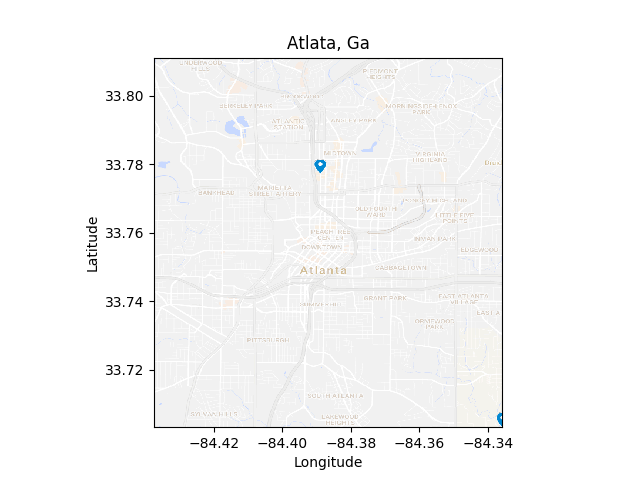

-84.43748 33.7032 -84.33586 33.8111


In [6]:
ATL = misc.imread("./assets/atl.png")
P1 = (-84.43748, 33.8111)
P2 = (-84.33586, 33.7032)
KYS = (33.77724, -84.38812)
min_x, min_y, max_x, max_y = min(P1[0],P2[0]), min(P1[1],P2[1]), max(P1[0],P2[0]), max(P1[1],P2[1])
extent = min_x, max_x, min_y, max_y
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.imshow(ATL, extent=extent)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Atlata, Ga")
print(min_x, min_y, max_x, max_y)

# Filter Data
To only those items which are located on the map.

In [7]:
print(min(data['x']), min(data['y']))
print(max(data['x']), max(data['y']))
print(min(P1[0],P2[0]), min(P1[1],P2[1]))
print(max(P1[0],P2[0]), max(P1[1],P2[1]))
data_map = data[data['x']>min(P1[0],P2[0])]
data_map = data_map[data_map['x']<max(P1[0],P2[0])]
data_map = data_map[data_map['y']>min(P1[1],P2[1])]
data_map = data_map[data_map['y']<max(P1[1],P2[1])]
data_map.head()

-84.5505 33.62522
-84.29042 33.88424
-84.43748 33.7032
-84.33586 33.8111


,MI_PRINX,offense_id,rpt_date,occur_date,occur_time,poss_date,poss_time,beat,apt_office_prefix,apt_office_num,...,dispo_code,MaxOfnum_victims,Shift,Avg Day,loc_type,UC2 Literal,neighborhood,npu,x,y
0,5637549,150102493,01/10/2016,01/10/2016,22:00:00,01/10/2016,22:00:00,511,NaN,NaN,...,NaN,1.0,Eve,Sun,21.0,BURGLARY-NONRES,Downtown,M,-84.39487,33.75757
1,5641270,150611492,03/01/2016,02/25/2016,12:00:00,02/29/2016,19:00:00,412,NaN,NaN,...,NaN,1.0,Unk,Unk,20.0,LARCENY-NON VEHICLE,Vine City,L,-84.41411,33.75823
2,5648012,151471800,05/26/2016,05/26/2016,08:30:00,05/26/2016,13:00:00,206,NaN,NaN,...,NaN,1.0,Day,Thu,99.0,LARCENY-NON VEHICLE,Blandtown,D,-84.42561,33.80058
7,5666797,160010061,01/01/2016,01/01/2016,00:03:00,01/01/2016,00:09:00,403,NaN,NaN,...,NaN,2.0,Morn,Fri,20.0,AGG ASSAULT,Venetian Hills,S,-84.43107,33.72209
10,5666800,160010159,01/01/2016,12/31/2015,23:00:00,01/01/2016,00:30:00,305,NaN,NaN,...,NaN,2.0,Morn,Thu,4.0,LARCENY-FROM VEHICLE,The Villages at Carver,Y,-84.38826,33.71193


# Plot
Lets try a couple of kinds of plots.

In [8]:
x = np.array(data_map['x']).astype("float")
y = np.array(data_map['y']).astype("float")

A Scatter plot will probably be too dense to really discern any meaning.

<IPython.core.display.Javascript object>


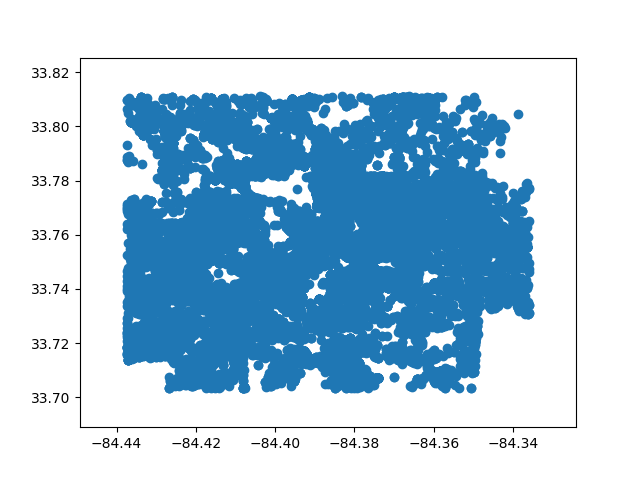

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.scatter(x,y)

So instead lets try a histogram.

<IPython.core.display.Javascript object>


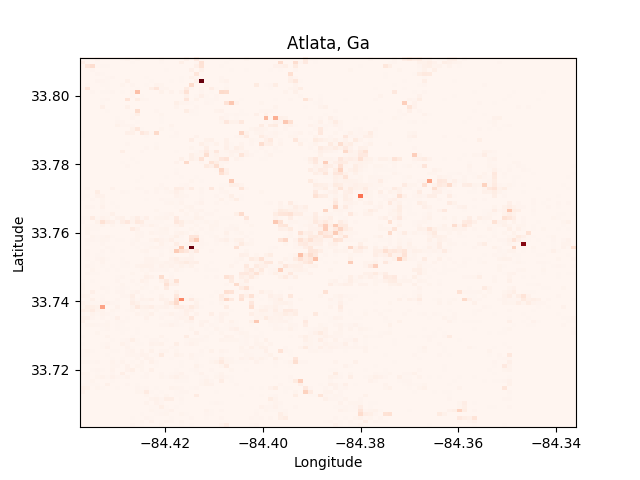

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.hist2d(x, y, bins=100,range=[[min_x, max_x], [min_y, max_y]], cmap="Reds")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Atlata, Ga")

Now let's try merging the images with the map.

<IPython.core.display.Javascript object>


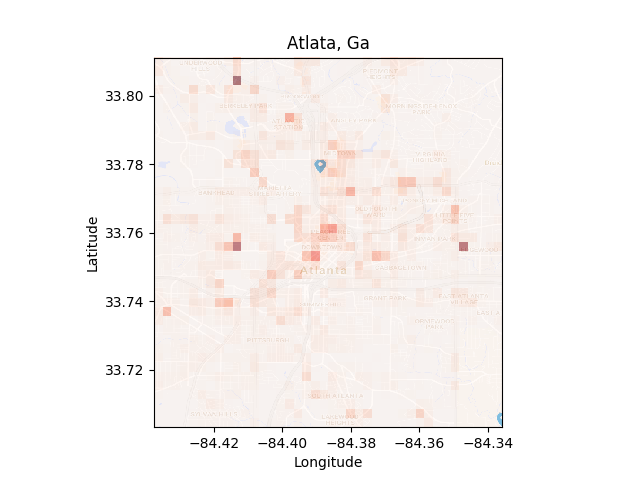

In [26]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
extent = min_x, max_x, min_y, max_y
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Atlata, Ga")

@interact(alpha=(0.,1.), bins=(10,100,1))    
def overlay(alpha, bins):
    ax.imshow(ATL, extent=extent)
    hist = ax.hist2d(x, y, bins=int(bins), range=[[min_x, max_x], [min_y, max_y]], alpha=alpha, cmap="Reds")

plt.show()